In [1]:
from COBRAmodel import *

# Spontaneous growth

In [4]:
from cobra.io import read_sbml_model

model = read_sbml_model(r"C:\Users\gonca\Documents\GitHub\UC_projeto\model.xml")

for reaction in model.reactions:
    if 'EX' in reaction.id or 'R_DM' in reaction.id or 'DM_' in reaction.id:
        reaction.lower_bound = 0

solution = model.optimize()
solution.objective_value # supposedly 0.0

3077 does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id


0.0

# Autotrophic growth

In [2]:
model = MyModel(r"C:\Users\gonca\Documents\GitHub\UC_projeto\model.xml", "e_Biomass__cytop")
model.reactions.get_by_id("DM_o2D__lum").bounds = (0, 8.31)
model.summary() #should be between 0.014-0.025

3077 does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id


Loading



Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


Reactions: 2670
Metabolites: 2225
Genes: 1312
Model loaded
Runnning pFBA


Metabolite,Reaction,Flux,C-Number,C-Flux
C00001__extr,EX_C00001__extr,5.977,0,0.00%
C00007__extr,EX_C00007__extr,0.04509,0,0.00%
C00009__extr,EX_C00009__extr,0.007029,0,0.00%
C00011__extr,EX_C00011__extr,7.74,1,99.98%
C00059__extr,EX_C00059__extr,0.004808,0,0.00%
C00080__extr,EX_C00080__extr,0.2968,0,0.00%
C00205__extr,EX_C00205__extr,182,0,0.00%
C00244__extr,EX_C00244__extr,0.1596,0,0.00%
C00305__extr,EX_C00305__extr,0.0005359,0,0.00%
C00378__extr,EX_C00378__extr,6.848E-05,12,0.01%


Nº of reversible and irreversible reactions

In [23]:
import pandas as pd

pathw = pd.read_excel(r"C:\Users\gonca\Documents\GitHub\UC_projeto\pathways.xlsx")

reversible_reactions = pathw[pathw['reversible'] == True] 
irreversible_reactions = pathw[pathw['reversible'] == False] 
unique_reversible_count = len(reversible_reactions['equation'].unique())
unique_irreversible_count = len(irreversible_reactions['equation'].unique())

counts_tuple = (unique_reversible_count, unique_irreversible_count)
counts_tuple

(704, 1601)

Pathways distribution

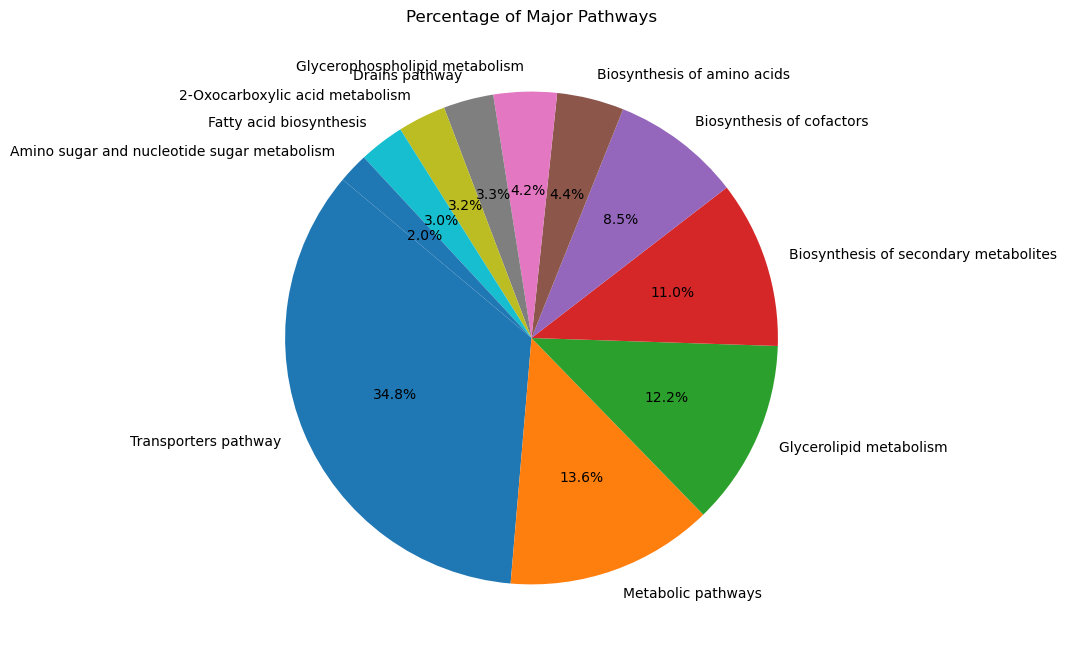

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

pathw = pd.read_excel(r"C:\Users\gonca\Documents\GitHub\UC_projeto\pathways.xlsx")

unique_pathways = pathw.drop_duplicates(subset='equation')
pathway_counts = unique_pathways['pathway name'].value_counts()
filtered_pathways = pathway_counts.iloc[0:11]
total_pathways = filtered_pathways.sum()
pathway_percentages = (filtered_pathways / total_pathways) * 100

plt.figure(figsize=(8, 8))
pathway_percentages.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Major Pathways')
plt.ylabel('')
plt.show()

Localization distribution

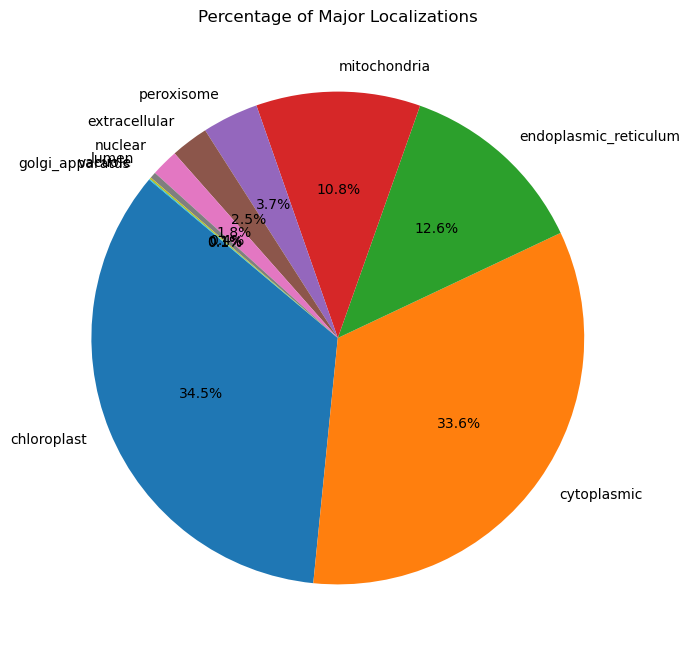

In [33]:
unique_pathways = pathw.drop_duplicates(subset='equation')

compartments_of_interest = ['extracellular', 'cytoplasmic', 'chloroplast', 'peroxisome', 'mitochondria', 'lumen', 'endoplasmic_reticulum', 'pfm', 'nuclear', 'golgi_apparatus', 'vacuole' ]
filtered_pathways = unique_pathways[unique_pathways['localisation'].isin(compartments_of_interest)]
localization_counts = filtered_pathways['localisation'].value_counts()
total_localizations = localization_counts.sum()
localization_percentages = (localization_counts / total_localizations) * 100

plt.figure(figsize=(8, 8))
localization_percentages.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Major Localizations')
plt.ylabel('')
plt.show()

Nitrate uptake rate for autotrophic growth

In [9]:
sol = model.optimize()
sol.fluxes["EX_C00244__extr"] #should be -0,063

-0.15829875276619695

# Heterotrophic growth

In [6]:
model = MyModel(r"C:\Users\gonca\Documents\GitHub\UC_projeto\model.xml", "e_Biomass__cytop")
model.reactions.get_by_id("EX_C00267__extr").bounds = (-0.3025, 1000) #alpha-d-glucose
model.reactions.get_by_id("EX_C00011__extr").bounds = (-11.16,10000)
model.reactions.get_by_id("EX_C00205__extr").bounds = (0, 0)
model.reactions.get_by_id("R03140__chlo").bounds = (0, 0) # EC 4.1.1.39 
model.reactions.get_by_id("R00024__chlo").bounds = (0, 0) # EC 4.1.1.39 
model.reactions.get_by_id("R00024__cytop").bounds = (0, 0) # EC 4.1.1.39     -> confirmar se sao as msm reaçoes e enzimas que estao no artigo
model.reactions.get_by_id("R01523__chlo").bounds = (0, 0) # EC 2.7.1.19 
model.reactions.get_by_id("R01063__chlo").bounds = (0, 0) # EC 1.2.1.13 
model.summary() #heterotrophic, should be between 0.018-0.025

Loading



3077 does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


Reactions: 2670
Metabolites: 2225
Genes: 1312
Model loaded
Runnning pFBA


Metabolite,Reaction,Flux,C-Number,C-Flux
C00007__extr,EX_C00007__extr,0.01155,0,0.00%
C00009__extr,EX_C00009__extr,0.001997,0,0.00%
C00059__extr,EX_C00059__extr,0.001366,0,0.00%
C00080__extr,EX_C00080__extr,0.08386,0,0.00%
C00244__extr,EX_C00244__extr,0.04473,0,0.00%
C00267__extr,EX_C00267__extr,0.3025,6,99.98%
C00378__extr,EX_C00378__extr,1.946E-05,12,0.01%
C02823__extr,EX_C02823__extr,2.013E-06,63,0.01%
C14818__extr,EX_C14818__extr,4.132E-05,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux


Nitrate uptake rate for heterotrophic growth

In [7]:
sol = model.optimize()
sol.fluxes["EX_C00244__extr"] #should be -0,049

-0.04473496864161861

# Heterotrophic growth + Tryptophan

In [8]:
model = MyModel(r"C:\Users\gonca\Documents\GitHub\UC_projeto\model.xml", "e_Biomass__cytop")
model.reactions.get_by_id("EX_C00078__extr").bounds = (-10, 1000) #tryptophan
model.reactions.get_by_id("EX_C00267__extr").bounds = (-0.3025, 1000) #alpha-d-glucose
model.reactions.get_by_id("EX_C00205__extr").bounds = (-0,0) #photon
model.reactions.get_by_id("EX_C00011__extr").bounds = (-11.16,10000) #co2
model.reactions.get_by_id("R03140__chlo").bounds = (0, 0) # EC 4.1.1.39 
model.reactions.get_by_id("R00024__chlo").bounds = (0, 0) # EC 4.1.1.39 
model.reactions.get_by_id("R00024__cytop").bounds = (0, 0) # EC 4.1.1.39     -> confirmar se sao as msm reaçoes e enzimas que estao no artigo
model.reactions.get_by_id("R01523__chlo").bounds = (0, 0) # EC 2.7.1.19 
model.reactions.get_by_id("R01063__chlo").bounds = (0, 0) # EC 1.2.1.13 
model.summary() #heterotrophic + tryptophan, should be between 0.040

Loading



3077 does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


Reactions: 2670
Metabolites: 2225
Genes: 1312
Model loaded
Runnning pFBA


Metabolite,Reaction,Flux,C-Number,C-Flux
C00007__extr,EX_C00007__extr,0.01159,0,0.00%
C00009__extr,EX_C00009__extr,0.002004,0,0.00%
C00059__extr,EX_C00059__extr,0.001371,0,0.00%
C00078__extr,EX_C00078__extr,0.000399,11,0.24%
C00080__extr,EX_C00080__extr,0.08335,0,0.00%
C00244__extr,EX_C00244__extr,0.04409,0,0.00%
C00267__extr,EX_C00267__extr,0.3025,6,99.74%
C00378__extr,EX_C00378__extr,1.952E-05,12,0.01%
C02823__extr,EX_C02823__extr,2.02E-06,63,0.01%
C14818__extr,EX_C14818__extr,4.146E-05,0,0.00%


# Heterotrophic growth + Methionine

In [10]:
model = MyModel(r"C:\Users\gonca\Documents\GitHub\UC_projeto\model.xml", "e_Biomass__cytop")
model.reactions.get_by_id("EX_C00267__extr").bounds = (-0.3025, 1000) #alpha-d-glucose
model.reactions.get_by_id("EX_C00011__extr").bounds = (-11.16,10000) #co2
model.reactions.get_by_id("EX_C00205__extr").bounds = (-0,0) #photon
model.reactions.get_by_id("EX_C00073__extr").bounds = (-10, 1000) #methionine
model.reactions.get_by_id("R03140__chlo").bounds = (0, 0) # EC 4.1.1.39 
model.reactions.get_by_id("R00024__chlo").bounds = (0, 0) # EC 4.1.1.39 
model.reactions.get_by_id("R00024__cytop").bounds = (0, 0) # EC 4.1.1.39     -> confirmar se sao as msm reaçoes e enzimas que estao no artigo
model.reactions.get_by_id("R01523__chlo").bounds = (0, 0) # EC 2.7.1.19 
model.reactions.get_by_id("R01063__chlo").bounds = (0, 0) # EC 1.2.1.13 
model.summary() #heterotrophic + methionine, should be 0.032

3077 does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id


Loading



Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


Reactions: 2670
Metabolites: 2225
Genes: 1312
Model loaded
Runnning pFBA


Metabolite,Reaction,Flux,C-Number,C-Flux
C00007__extr,EX_C00007__extr,0.01158,0,0.00%
C00009__extr,EX_C00009__extr,0.002003,0,0.00%
C00059__extr,EX_C00059__extr,0.0007741,0,0.00%
C00073__extr,EX_C00073__extr,0.0005961,5,0.16%
C00080__extr,EX_C00080__extr,0.08233,0,0.00%
C00244__extr,EX_C00244__extr,0.04428,0,0.00%
C00267__extr,EX_C00267__extr,0.3025,6,99.82%
C00378__extr,EX_C00378__extr,1.952E-05,12,0.01%
C02823__extr,EX_C02823__extr,2.019E-06,63,0.01%
C14818__extr,EX_C14818__extr,4.145E-05,0,0.00%


# Heterotrophic growth + Acetate

In [11]:
model = MyModel(r"C:\Users\gonca\Documents\GitHub\UC_projeto\model.xml", "e_Biomass__cytop")
model.reactions.get_by_id("EX_C00267__extr").bounds = (-0.3025, 1000) #alpha-d-glucose
model.reactions.get_by_id("EX_C00205__extr").bounds = (-0,0) #photon
model.reactions.get_by_id("EX_C00011__extr").bounds = (-11.16,10000) #co2
model.reactions.get_by_id("EX_C00033__extr").bounds = (-15, 1000) #acetate
model.reactions.get_by_id("R03140__chlo").bounds = (0, 0) # EC 4.1.1.39 
model.reactions.get_by_id("R00024__chlo").bounds = (0, 0) # EC 4.1.1.39 
model.reactions.get_by_id("R00024__cytop").bounds = (0, 0) # EC 4.1.1.39     -> confirmar se sao as msm reaçoes e enzimas que estao no artigo
model.reactions.get_by_id("R01523__chlo").bounds = (0, 0) # EC 2.7.1.19 
model.reactions.get_by_id("R01063__chlo").bounds = (0, 0) # EC 1.2.1.13 
model.summary() #heterotrophic + acetate, should be 0.017

3077 does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id


Loading



Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


Reactions: 2670
Metabolites: 2225
Genes: 1312
Model loaded
Runnning pFBA


Metabolite,Reaction,Flux,C-Number,C-Flux
C00007__extr,EX_C00007__extr,0.01155,0,0.00%
C00009__extr,EX_C00009__extr,0.001997,0,0.00%
C00059__extr,EX_C00059__extr,0.001366,0,0.00%
C00080__extr,EX_C00080__extr,0.08386,0,0.00%
C00244__extr,EX_C00244__extr,0.04473,0,0.00%
C00267__extr,EX_C00267__extr,0.3025,6,99.98%
C00378__extr,EX_C00378__extr,1.946E-05,12,0.01%
C02823__extr,EX_C02823__extr,2.013E-06,63,0.01%
C14818__extr,EX_C14818__extr,4.132E-05,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux


# Mixotrophic growth

In [12]:
model = MyModel(r"C:\Users\gonca\Documents\GitHub\UC_projeto\model.xml", "e_Biomass__cytop")
model.reactions.get_by_id("EX_C00267__extr").bounds = (-0.3025, 1000) #alpha-d-glucose
model.reactions.get_by_id("DM_o2D__lum").bounds = (0, 8.31)
model.summary() # Mixotrophic growth, should be between 0.02-0.03

Loading



3077 does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


Reactions: 2670
Metabolites: 2225
Genes: 1312
Model loaded
Runnning pFBA


Metabolite,Reaction,Flux,C-Number,C-Flux
C00001__extr,EX_C00001__extr,5.148,0,0.00%
C00007__extr,EX_C00007__extr,0.06442,0,0.00%
C00009__extr,EX_C00009__extr,0.01114,0,0.00%
C00011__extr,EX_C00011__extr,7.431,1,80.35%
C00059__extr,EX_C00059__extr,0.00762,0,0.00%
C00080__extr,EX_C00080__extr,0.4678,0,0.00%
C00205__extr,EX_C00205__extr,182,0,0.00%
C00244__extr,EX_C00244__extr,0.2496,0,0.00%
C00267__extr,EX_C00267__extr,0.3025,6,19.63%
C00378__extr,EX_C00378__extr,0.0001085,12,0.01%


# Growth rate for photoautotrophic growth at different CO2

In [ ]:
l = []
co2 = []
for x in range(0, 22, 2):
    model = MyModel(r"C:\Users\gonca\Documents\GitHub\UC_projeto\model.xml", "e_Biomass__cytop")
    model.reactions.get_by_id("DM_o2D__lum").bounds = (0, 8.31)
    model.reactions.get_by_id("EX_C00011__extr").bounds = (-x, 1000) 
    sol = model.optimize().objective_value
    l.append(sol)
    co2.append(x)

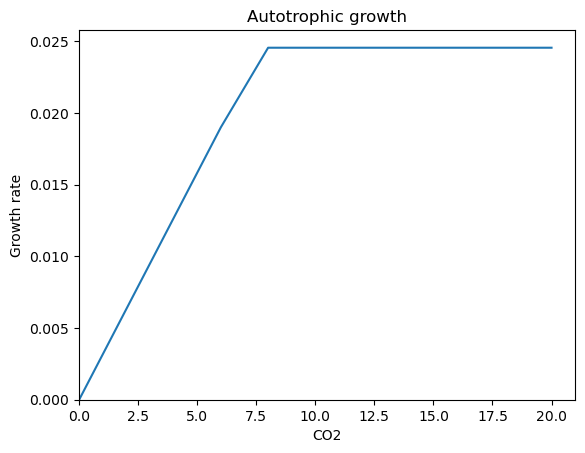

In [19]:
import matplotlib.pyplot as plt

plt.plot(co2, l)
plt.xlabel("CO2")
plt.ylabel("Growth rate")
plt.title("Autotrophic growth")  
plt.xlim(0) 
plt.ylim(0) 

plt.show()

Theoretical growth rate after the addition of ...

In [25]:
model = MyModel(r"C:\Users\gonca\Documents\GitHub\UC_projeto\model.xml", "e_Biomass__cytop")
#model.reactions.get_by_id("EX_C00267__extr").bounds = (-0.3025, 1000) #alpha-d-glucose
model.reactions.get_by_id("DM_o2D__lum").bounds = (0, 8.31)
model.reactions.get_by_id("EX_C00033__extr").bounds = (-10, 10000)
model.summary()

3077 does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id


Loading



Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


Reactions: 2666
Metabolites: 2223
Genes: 1312
Model loaded
Runnning pFBA


Metabolite,Reaction,Flux,C-Number,C-Flux
C00001__extr,EX_C00001__extr,5.99,0,0.00%
C00007__extr,EX_C00007__extr,0.04091,0,0.00%
C00009__extr,EX_C00009__extr,0.007067,0,0.00%
C00011__extr,EX_C00011__extr,7.752,1,99.98%
C00059__extr,EX_C00059__extr,0.004834,0,0.00%
C00080__extr,EX_C00080__extr,0.2967,0,0.00%
C00205__extr,EX_C00205__extr,182,0,0.00%
C00244__extr,EX_C00244__extr,0.1583,0,0.00%
C00378__extr,EX_C00378__extr,6.885E-05,12,0.01%
C02823__extr,EX_C02823__extr,7.123E-06,63,0.01%
